In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

import time
import pickle
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.base import clone
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:

# Training set
X_train = np.load('/content/drive/MyDrive/Gr3_Fabric_Classification/data/image_extraction/resnet50_extraction/train/train_features.npy')
y_train = np.load('/content/drive/MyDrive/Gr3_Fabric_Classification/data/image_extraction/resnet50_extraction/train/train_labels.npy')

# Validation set
X_val = np.load('/content/drive/MyDrive/Gr3_Fabric_Classification/data/image_extraction/resnet50_extraction/validation/validation_features.npy')
y_val = np.load('/content/drive/MyDrive/Gr3_Fabric_Classification/data/image_extraction/resnet50_extraction/validation/validation_labels.npy')

# Testing set
X_test = np.load('/content/drive/MyDrive/Gr3_Fabric_Classification/data/image_extraction/resnet50_extraction/test/test_features.npy')
y_test = np.load('/content/drive/MyDrive/Gr3_Fabric_Classification/data/image_extraction/resnet50_extraction/test/test_labels.npy')


In [4]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")




X_train shape: (9030, 7, 7, 2048)
y_train shape: (9030, 6)
X_val shape: (2256, 7, 7, 2048)
y_val shape: (2256, 6)
X_test shape: (939, 7, 7, 2048)
y_test shape: (939, 6)


In [5]:
# Reshape
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_val_reshaped = X_val.reshape(X_val.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

In [6]:
X_train_reshaped.shape

(9030, 100352)

In [7]:
from sklearn.preprocessing import Normalizer

# Sử dụng Normalizer
normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train_reshaped)
X_val_normalized = normalizer.transform(X_val_reshaped)
X_test_normalized = normalizer.transform(X_test_reshaped)


In [8]:
X_train = X_train_normalized
X_val = X_val_normalized
X_test = X_test_normalized

In [9]:
y_train = np.argmax(y_train, axis=1)
y_val = np.argmax(y_val, axis=1)
y_test = np.argmax(y_test, axis=1)

In [ ]:
y_train.shape

In [10]:

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_val_pca shape: {X_val_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")

X_train_pca shape: (9030, 4094)
X_val_pca shape: (2256, 4094)
X_test_pca shape: (939, 4094)


In [11]:

print(f"X_train shape: {X_train.shape}")
print(f"X_train_pca shape: {X_train_pca.shape}")

X_train shape: (9030, 100352)
X_train_pca shape: (9030, 4094)


In [12]:
X_train = X_train_pca
X_val = X_val_pca
X_test = X_test_pca

<ipython-input-13-b293cfbf56f6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_labels, palette='pastel', order=label_mapping.values())
<ipython-input-13-b293cfbf56f6>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_val_labels, palette='pastel', order=label_mapping.values())


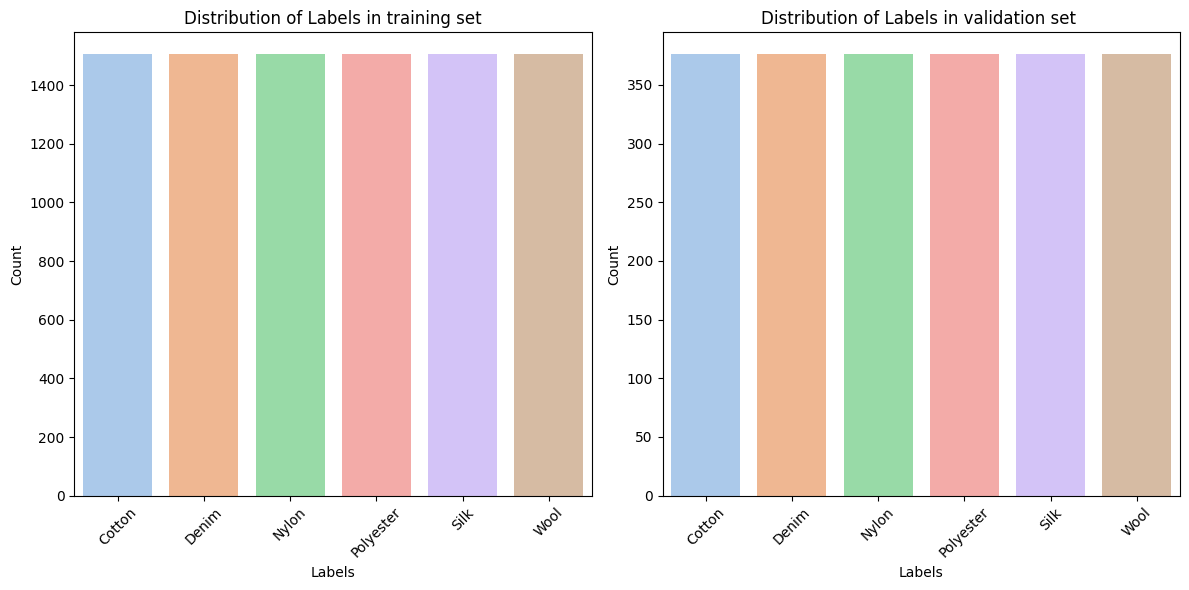

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

label_mapping = {0: 'Cotton', 1: 'Denim', 2: 'Nylon', 3: 'Polyester', 4: 'Silk', 5: 'Wool'}

y_train_labels = [label_mapping[label] for label in y_train]
y_val_labels = [label_mapping[label] for label in y_val]

plt.figure(figsize=(12, 6))

# Biểu đồ cho y_train
plt.subplot(1, 2, 1)
sns.countplot(x=y_train_labels, palette='pastel', order=label_mapping.values())
plt.title('Distribution of Labels in training set')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Biểu đồ cho y_val
plt.subplot(1, 2, 2)
sns.countplot(x=y_val_labels, palette='pastel', order=label_mapping.values())
plt.title('Distribution of Labels in validation set ')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [14]:
print(f'+ x_shape: {X_train.shape}, y_shape: {y_train.shape}')
print(f'+ Input:\n{X_train[:20, :]}')
print(f'+ Output:\n{y_train[:20]}')

+ x_shape: (9030, 4094), y_shape: (9030,)
+ Input:
[[-0.32562333 -0.14072958 -0.05025582 ... -0.00076607  0.00251565
   0.00183042]
 [ 0.35477155 -0.09270671 -0.0147409  ...  0.00164573  0.0069003
   0.00555904]
 [-0.21582735  0.07465659  0.05255622 ... -0.00137991 -0.00097464
  -0.00333049]
 ...
 [ 0.26210454 -0.2622422  -0.04224547 ... -0.00786179 -0.00172682
   0.00795029]
 [-0.26229283  0.34723166  0.06187547 ...  0.00577005  0.00042944
   0.00158454]
 [-0.3113868  -0.04827727 -0.08593044 ... -0.00551009  0.00426164
   0.00290287]]
+ Output:
[1 5 3 4 3 2 1 3 4 3 1 1 2 4 5 0 3 1 4 0]


In [15]:
params = {
    "random_state": 42,
}


In [16]:
import os
import time
import numpy as np
import pickle
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.base import clone
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

models = {
    "XGBoost": xgb.XGBClassifier(random_state=params["random_state"]),
    "LightGBM": lgb.LGBMClassifier(random_state=params["random_state"]),
    "Random Forest": RandomForestClassifier(random_state=params["random_state"]),
    "AdaBoost": AdaBoostClassifier(),
    "MLP": MLPClassifier(random_state=params["random_state"]),
    "SVM": SVC(probability=True, random_state=params["random_state"]),
    "CART (Decision Trees)": DecisionTreeClassifier(random_state=params["random_state"]),
    "Logistic Regression": LogisticRegression(random_state=params["random_state"]),
    "LDA": LinearDiscriminantAnalysis(),
    'kNN': KNeighborsClassifier(),
}

base_path = '/content/drive/MyDrive/Gr3_Fabric_Classification/models/save_models/model_2'
os.makedirs(base_path, exist_ok=True)

all_results = {}

def run_and_save_model(model_name, model, X_train, y_train, X_val, y_val, params):

    model_results = {'accuracy': None, 'f1': None, 'precision': None, 'recall': None, 'auc': None}

    print(f'Model [{model_name}]:')

    start_time = time.time()

    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_val_pred = model.predict(X_val)
    y_val_prob = model.predict_proba(X_val)  # Dự đoán xác suất cho AUC

    # Tính toán metrics: accuracy, f1-score, precision, recall
    model_results['accuracy'] = accuracy_score(y_val, y_val_pred)
    model_results['f1'] = f1_score(y_val, y_val_pred, average='weighted')
    model_results['precision'] = precision_score(y_val, y_val_pred, average='weighted')
    model_results['recall'] = recall_score(y_val, y_val_pred, average='weighted')
    model_results['auc'] = roc_auc_score(y_val, y_val_prob, multi_class='ovr')

    # Lưu mô hình huấn luyện lại vào file
    model_full_train_path = os.path.join(base_path, f'{model_name}_model_full_train.pkl')
    with open(model_full_train_path, 'wb') as model_full_train_file:
        pickle.dump(model, model_full_train_file)

    # Lưu kết quả vào all_results
    all_results[model_name] = model_results

    # Hiển thị kết quả metrics
    print(f'+ Accuracy: {model_results["accuracy"]:.4f}')
    print(f'+ F1 Score: {model_results["f1"]:.4f}')
    print(f'+ Precision: {model_results["precision"]:.4f}')
    print(f'+ Recall: {model_results["recall"]:.4f}')
    print(f'+ AUC: {model_results["auc"]:.4f}')

    # Hiển thị thời gian hoàn thành
    elapsed_time = time.time() - start_time
    print(f'+ Time taken for {model_name}: {elapsed_time:.4f} seconds')

# Lặp qua từng mô hình
for model_name, model in models.items():
    run_and_save_model(model_name, model, X_train, y_train, X_val, y_val, params)

# Lưu tất cả kết quả vào một file
results_path = os.path.join(base_path, 'all_models_results.pkl')
with open(results_path, 'wb') as result_file:
    pickle.dump(all_results, result_file)

print("All models results saved to:", results_path)


Model [XGBoost]:
+ Accuracy: 0.8378
+ F1 Score: 0.8354
+ Precision: 0.8360
+ Recall: 0.8378
+ AUC: 0.9775
+ Time taken for XGBoost: 298.9377 seconds
Model [LightGBM]:
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.330154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1043970
[LightGBM] [Info] Number of data points in the train set: 9030, number of used features: 4094
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
+ Accuracy: 0.8431
+ F1 Score: 0.8407
+ Precision: 0.8406
+ Recall: 0.8431
+ AUC: 0.9775
+ Time taken for LightGBM: 136.9810 seconds
Model [Random Forest]:
+ Accuracy: 0.6879
+ F1 Score: 0.6770
+ Precision: 0.6886
+ 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


+ Accuracy: 0.5106
+ F1 Score: 0.5010
+ Precision: 0.5088
+ Recall: 0.5106
+ AUC: 0.7871
+ Time taken for AdaBoost: 266.6447 seconds
Model [MLP]:
+ Accuracy: 0.9184
+ F1 Score: 0.9182
+ Precision: 0.9181
+ Recall: 0.9184
+ AUC: 0.9922
+ Time taken for MLP: 51.7163 seconds
Model [SVM]:
+ Accuracy: 0.8963
+ F1 Score: 0.8949
+ Precision: 0.8950
+ Recall: 0.8963
+ AUC: 0.9899
+ Time taken for SVM: 1086.0823 seconds
Model [CART (Decision Trees)]:
+ Accuracy: 0.6237
+ F1 Score: 0.6225
+ Precision: 0.6218
+ Recall: 0.6237
+ AUC: 0.7742
+ Time taken for CART (Decision Trees): 71.0169 seconds
Model [Logistic Regression]:
+ Accuracy: 0.8409
+ F1 Score: 0.8393
+ Precision: 0.8401
+ Recall: 0.8409
+ AUC: 0.9780
+ Time taken for Logistic Regression: 22.0215 seconds
Model [LDA]:
+ Accuracy: 0.9171
+ F1 Score: 0.9180
+ Precision: 0.9198
+ Recall: 0.9171
+ AUC: 0.9911
+ Time taken for LDA: 22.1218 seconds
Model [kNN]:
+ Accuracy: 0.7988
+ F1 Score: 0.7970
+ Precision: 0.8046
+ Recall: 0.7988
+ AUC: 0.

In [17]:
df_results = pd.DataFrame.from_dict(all_results, orient='index')

df_results

,accuracy,f1,precision,recall,auc
XGBoost,0.837766,0.835435,0.836033,0.837766,0.977520
LightGBM,0.843085,0.840740,0.840639,0.843085,0.977513
Random Forest,0.687943,0.676955,0.688613,0.687943,0.915760
AdaBoost,0.510638,0.500993,0.508781,0.510638,0.787070
MLP,0.918440,0.918165,0.918060,0.918440,0.992166
SVM,0.896277,0.894899,0.895031,0.896277,0.989895
CART (Decision Trees),0.623670,0.622461,0.621831,0.623670,0.774202
Logistic Regression,0.840869,0.839258,0.840116,0.840869,0.977967
LDA,0.917110,0.918040,0.919785,0.917110,0.991123
kNN,0.798759,0.796996,0.804639,0.798759,0.957169


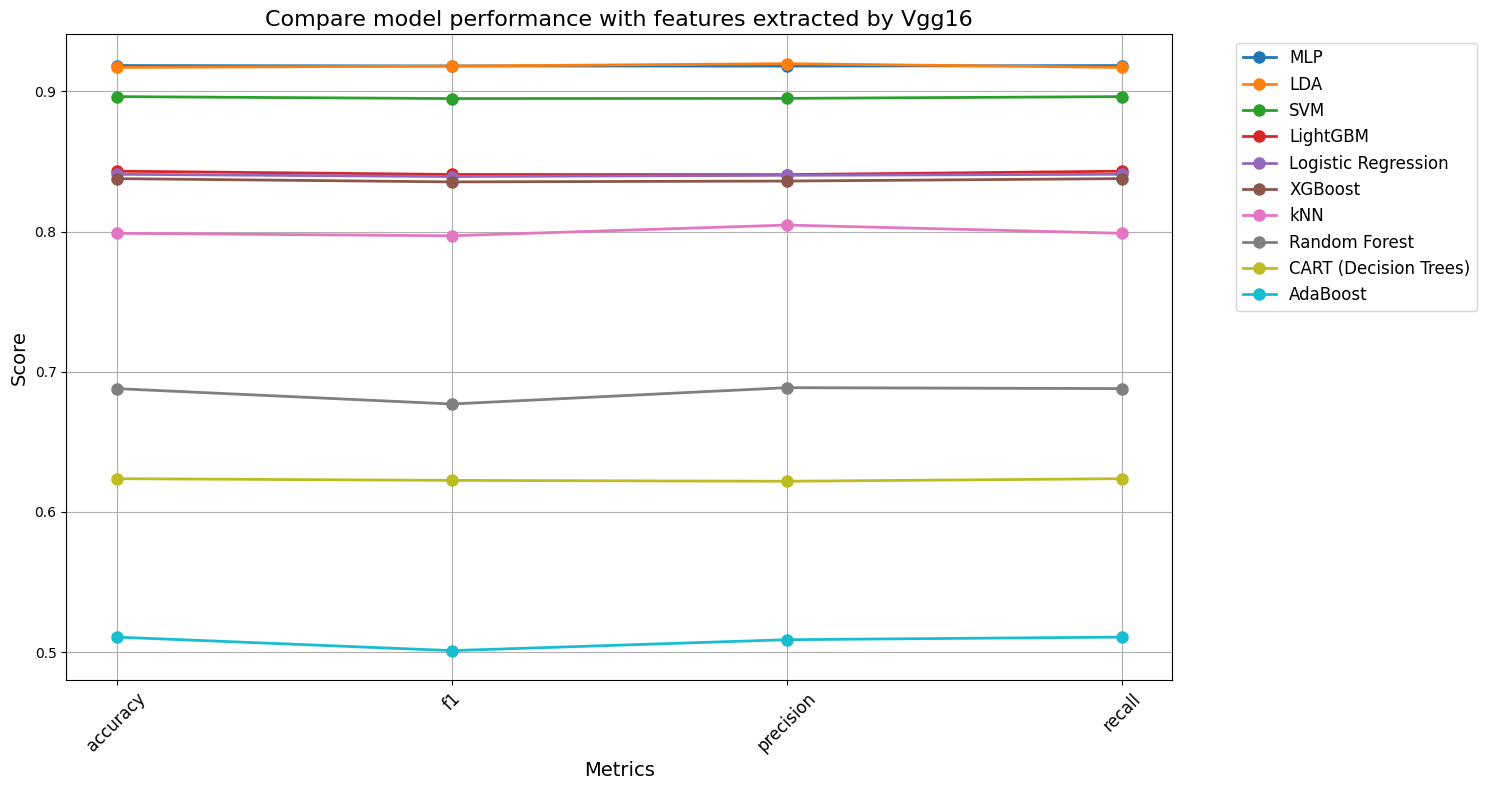

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả định df_results đã tồn tại và chứa các giá trị cho các metrics đã chỉ định
metrics = ['accuracy', 'f1', 'precision', 'recall']

# Tính toán điểm số trung bình cho mỗi model
df_results['average'] = df_results[metrics].mean(axis=1)

# Sắp xếp các model theo điểm số trung bình từ cao đến thấp
sorted_models = df_results.sort_values(by='average', ascending=False).index

# Tăng kích thước của biểu đồ
plt.figure(figsize=(15, 8))

# Vẽ từng model với các thông số theo thứ tự đã sắp xếp
for model_name in sorted_models:
    plt.plot(metrics, df_results.loc[model_name][metrics], marker='o', label=model_name, linewidth=2, markersize=8)

# Tăng kích thước nhãn và tiêu đề
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Compare model performance with features extracted by Vgg16', fontsize=16)

# Đặt legend ra ngoài vùng vẽ
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Bật lưới để dễ theo dõi
plt.grid(True)

# Xoay nhãn trục x nếu cần
plt.xticks(rotation=45, fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh tự động để không bị cắt bớt nội dung
plt.show()


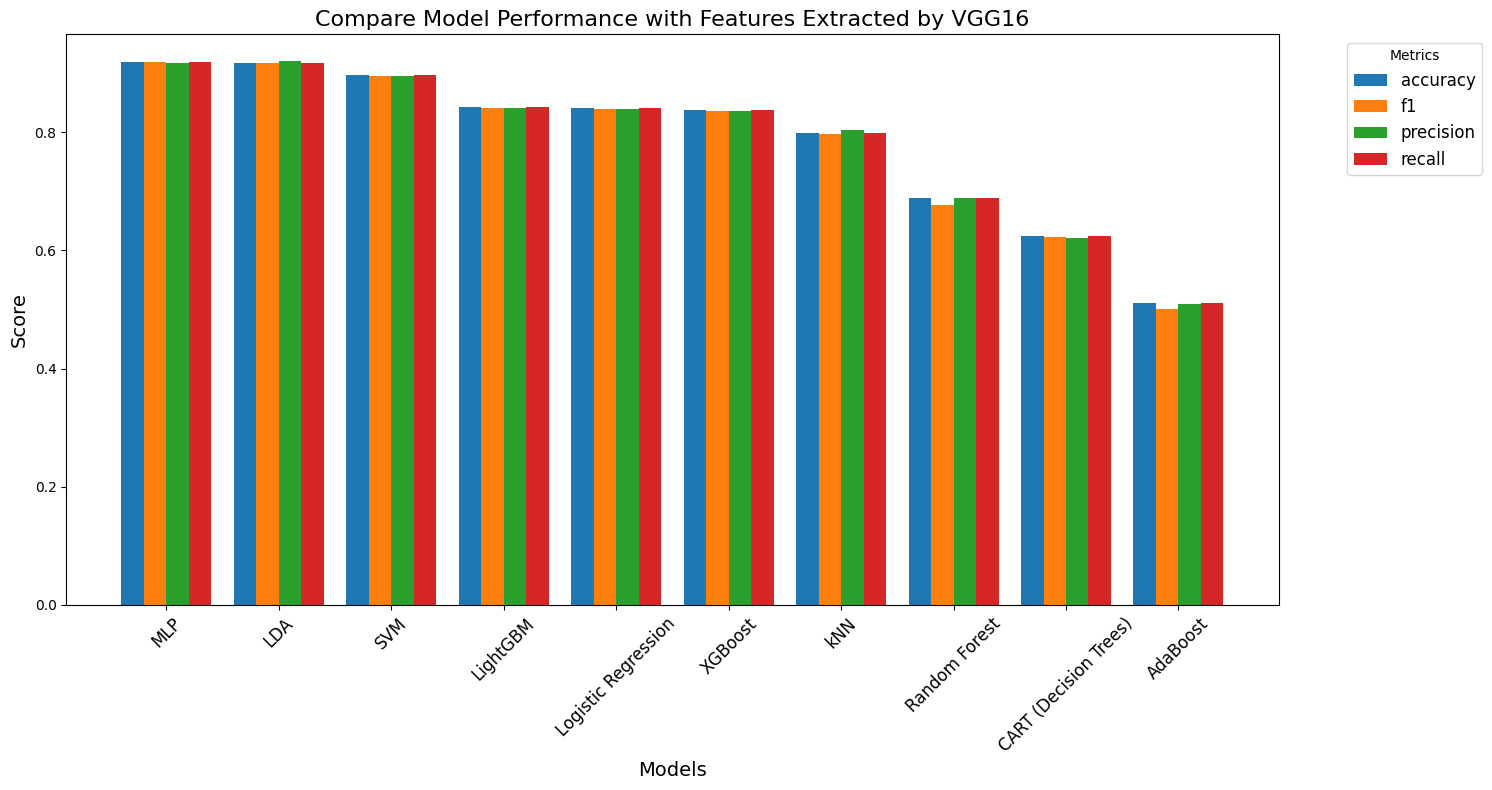

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Loại bỏ AUC khỏi danh sách metrics
metrics = ['accuracy', 'f1', 'precision', 'recall']  # Bỏ 'auc'

# Tạo màu sắc đậm cho từng metric
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Các mã màu đậm

# Tính toán điểm số trung bình cho mỗi model
df_results['average'] = df_results[metrics].mean(axis=1)

# Sắp xếp các model theo điểm số trung bình từ cao đến thấp
df_results_sorted = df_results.sort_values(by='average', ascending=False)

# Số lượng models và metrics
n_models = len(df_results_sorted.index)
n_metrics = len(metrics)

# Tạo khoảng cách trên trục x cho mỗi mô hình
x = np.arange(n_models)

# Độ rộng của mỗi cột trong một cụm (chia nhỏ cho các metrics trong mỗi model)
bar_width = 0.2

# Tăng kích thước của biểu đồ
plt.figure(figsize=(15, 8))

# Vẽ cột cho từng metric
for i, (metric, color) in enumerate(zip(metrics, colors)):
    # Tạo vị trí cho cột của metric thứ i, dịch chuyển cụm cột theo bar_width
    plt.bar(x + i * bar_width, df_results_sorted[metric], bar_width, label=metric, color=color)

# Đặt tên cho trục x và y
plt.xlabel('Models', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Compare Model Performance with Features Extracted by VGG16', fontsize=16)

# Đặt nhãn cho trục x (mỗi nhãn là một model)
plt.xticks(x + bar_width * (n_metrics-1) / 2, df_results_sorted.index, fontsize=12, rotation=45)

# Hiển thị legend ra ngoài đồ thị
plt.legend(title="Metrics", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Điều chỉnh layout để không bị tràn
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [21]:
import os
import joblib  # Hoặc sử dụng pickle nếu bạn đã sử dụng pickle để lưu mô hình

# Đường dẫn đến thư mục chứa các mô hình
model_folder = '/content/drive/MyDrive/Gr3_Fabric_Classification/models/save_models/model_2/'

# Tạo một danh sách để lưu các mô hình
models = {}

# Duyệt qua tất cả các tệp trong thư mục
for filename in os.listdir(model_folder):
    # Kiểm tra xem tệp có đuôi .pkl không
    if filename.endswith('_model_full_train.pkl'):
        # Tạo đường dẫn đầy đủ đến tệp
        file_path = os.path.join(model_folder, filename)
        # Tải mô hình và lưu vào từ điển
        models[filename] = joblib.load(file_path)  # Hoặc sử dụng pickle.load(file_path) nếu cần

# Kiểm tra kết quả
for model_name, model in models.items():
    print(f'Model name: {model_name}, Model type: {type(model)}')


Model name: XGBoost_model_full_train.pkl, Model type: <class 'xgboost.sklearn.XGBClassifier'>
Model name: LightGBM_model_full_train.pkl, Model type: <class 'lightgbm.sklearn.LGBMClassifier'>
Model name: Random Forest_model_full_train.pkl, Model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Model name: AdaBoost_model_full_train.pkl, Model type: <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
Model name: MLP_model_full_train.pkl, Model type: <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
Model name: SVM_model_full_train.pkl, Model type: <class 'sklearn.svm._classes.SVC'>
Model name: CART (Decision Trees)_model_full_train.pkl, Model type: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Model name: Logistic Regression_model_full_train.pkl, Model type: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Model name: LDA_model_full_train.pkl, Model type: <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
Mo

In [22]:
y_val

array([4, 4, 3, ..., 3, 3, 2])

Baseline [XGBoost_model_full_train.pkl]
+ Accuracy = 0.838
+ Precision = 0.836
+ Recall = 0.838
+ F1-score = 0.835
+ AUC = 0.978



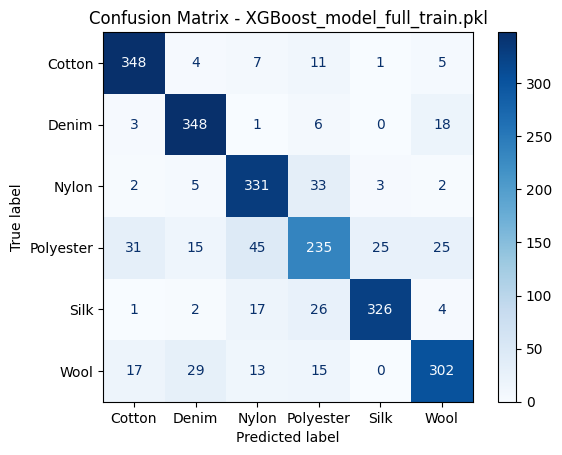

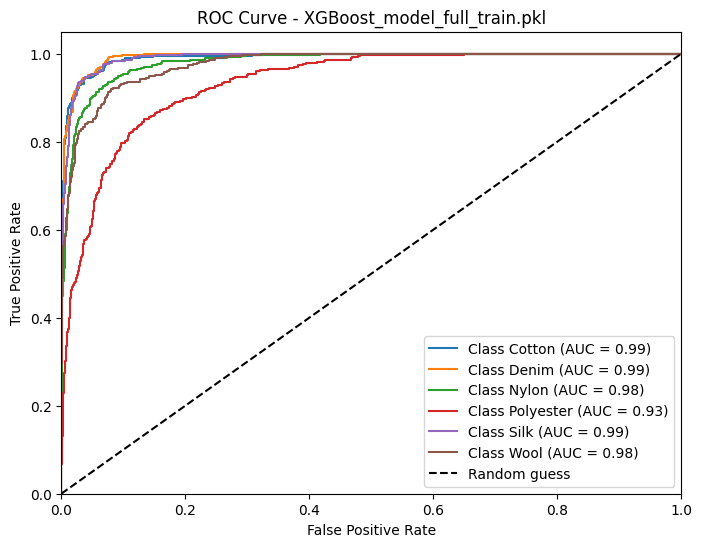

Baseline [LightGBM_model_full_train.pkl]
+ Accuracy = 0.843
+ Precision = 0.841
+ Recall = 0.843
+ F1-score = 0.841
+ AUC = 0.978



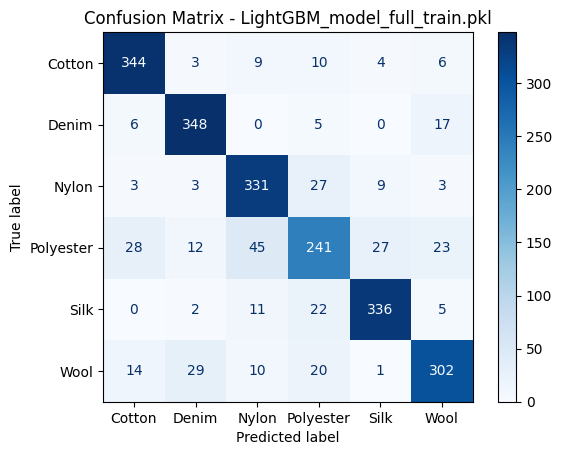

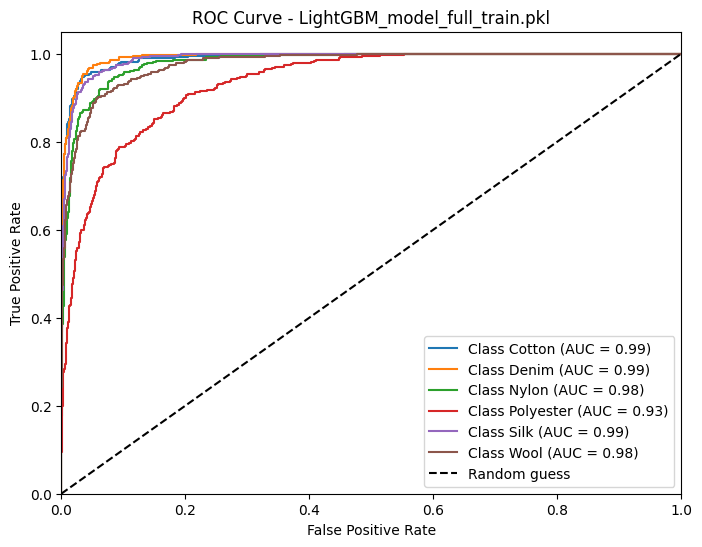

Baseline [Random Forest_model_full_train.pkl]
+ Accuracy = 0.688
+ Precision = 0.689
+ Recall = 0.688
+ F1-score = 0.677
+ AUC = 0.916



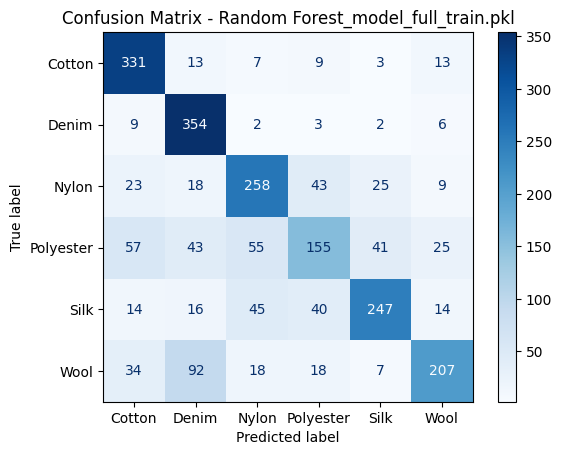

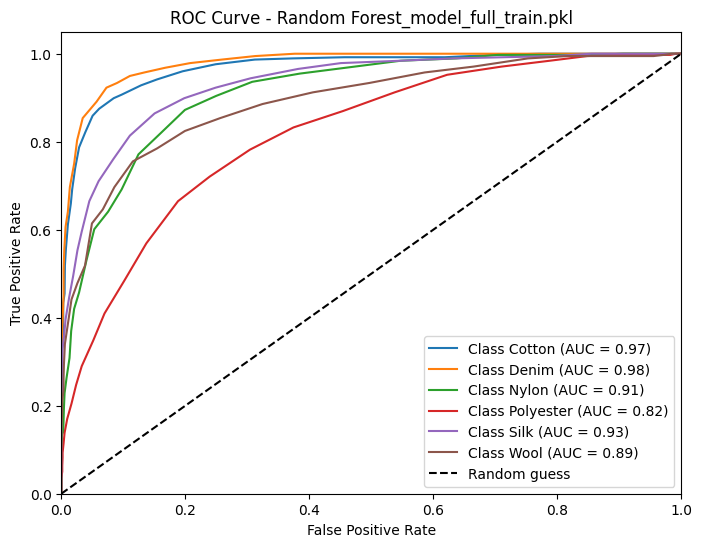

Baseline [AdaBoost_model_full_train.pkl]
+ Accuracy = 0.511
+ Precision = 0.509
+ Recall = 0.511
+ F1-score = 0.501
+ AUC = 0.787



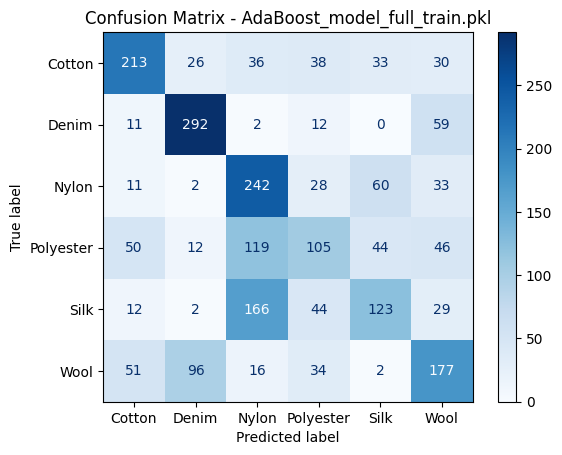

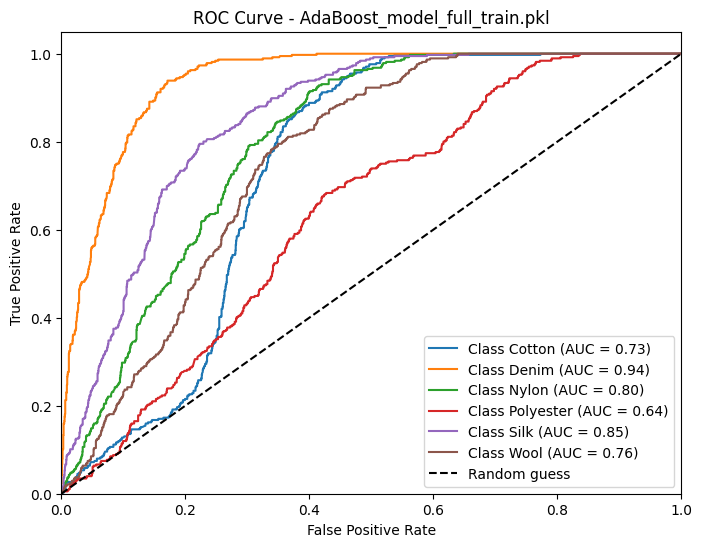

Baseline [MLP_model_full_train.pkl]
+ Accuracy = 0.918
+ Precision = 0.918
+ Recall = 0.918
+ F1-score = 0.918
+ AUC = 0.992



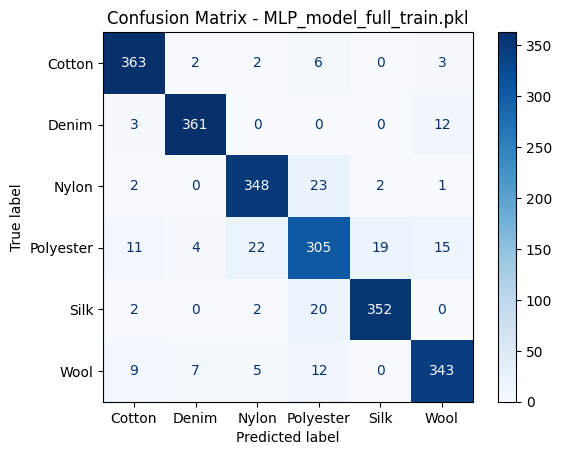

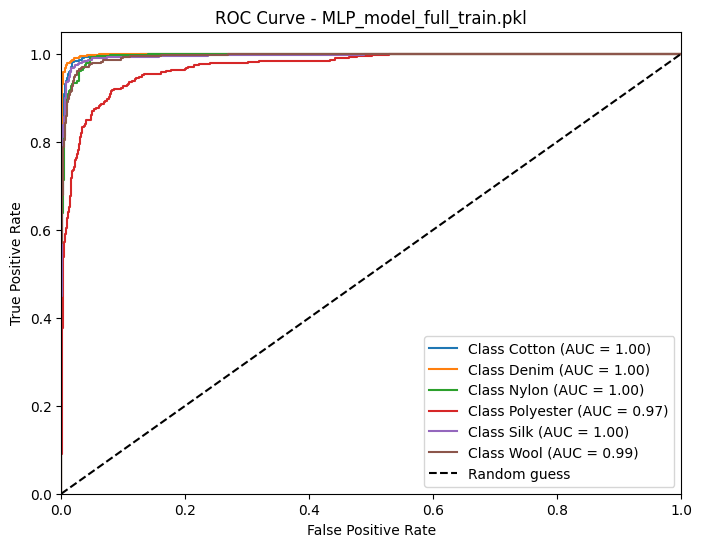

Baseline [SVM_model_full_train.pkl]
+ Accuracy = 0.896
+ Precision = 0.895
+ Recall = 0.896
+ F1-score = 0.895
+ AUC = 0.990



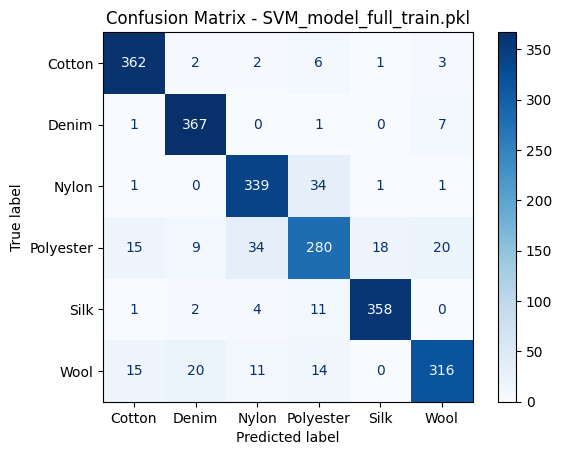

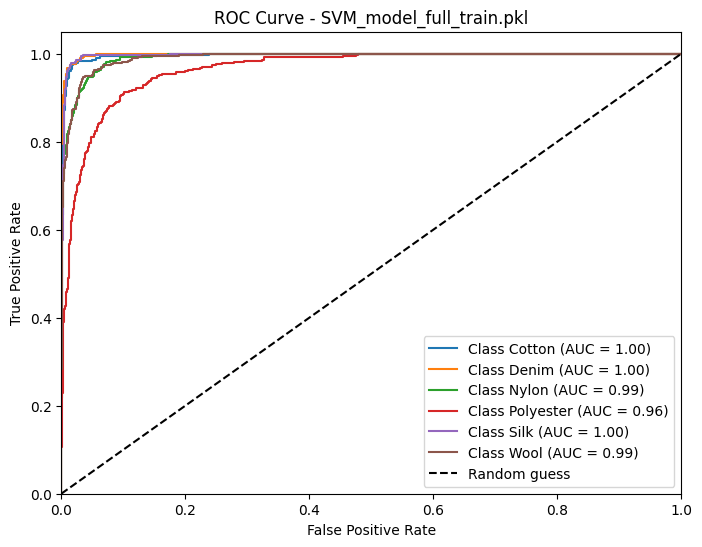

Baseline [CART (Decision Trees)_model_full_train.pkl]
+ Accuracy = 0.624
+ Precision = 0.622
+ Recall = 0.624
+ F1-score = 0.622
+ AUC = 0.774



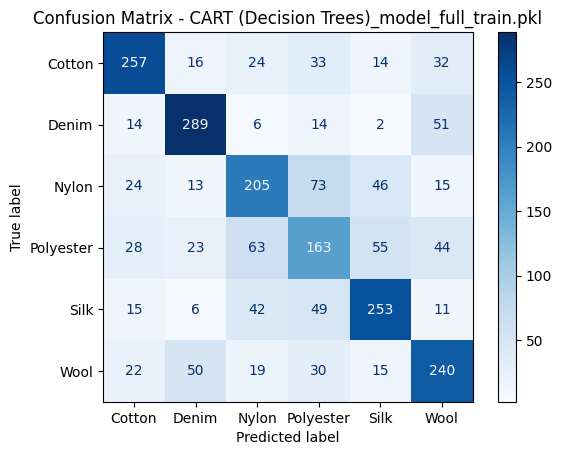

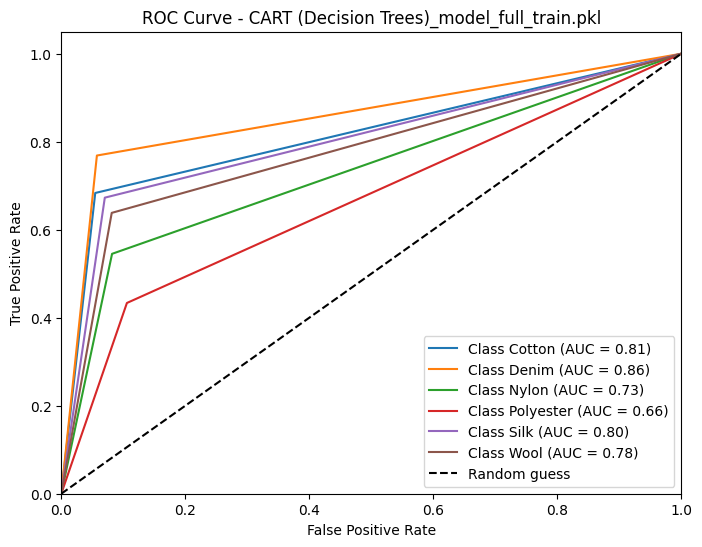

Baseline [Logistic Regression_model_full_train.pkl]
+ Accuracy = 0.841
+ Precision = 0.840
+ Recall = 0.841
+ F1-score = 0.839
+ AUC = 0.978



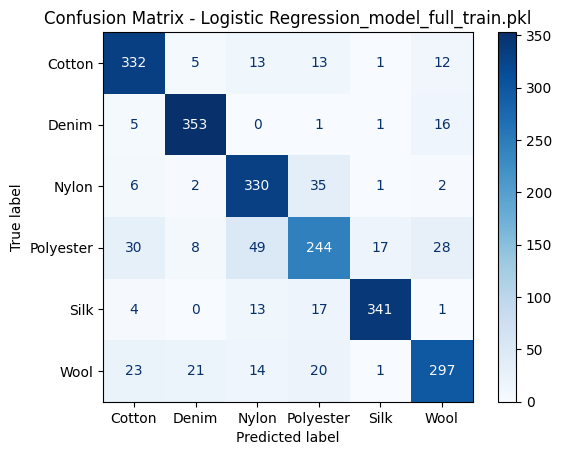

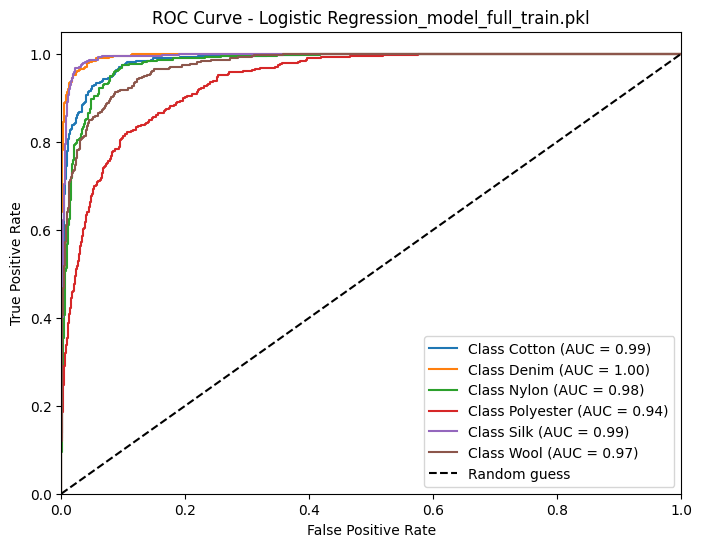

Baseline [LDA_model_full_train.pkl]
+ Accuracy = 0.917
+ Precision = 0.920
+ Recall = 0.917
+ F1-score = 0.918
+ AUC = 0.991



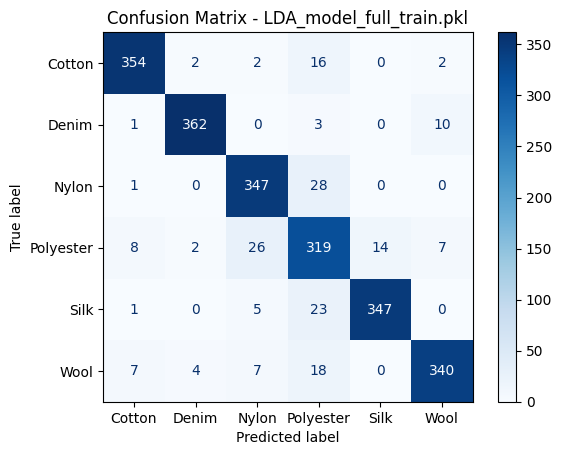

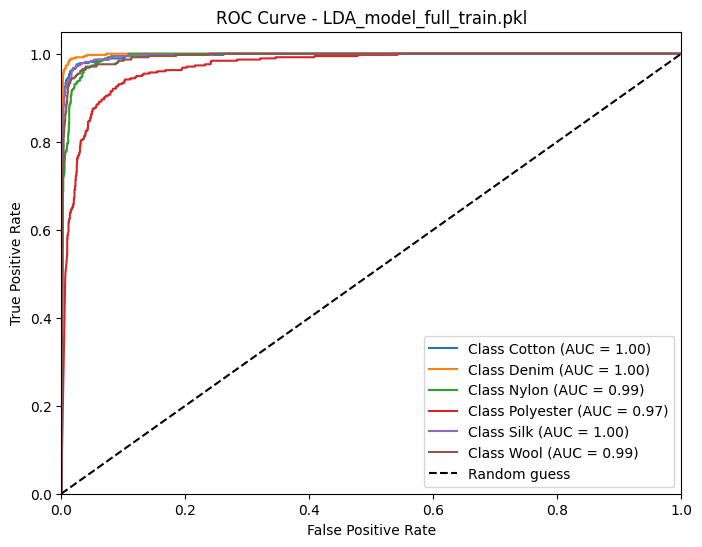

Baseline [kNN_model_full_train.pkl]
+ Accuracy = 0.799
+ Precision = 0.805
+ Recall = 0.799
+ F1-score = 0.797
+ AUC = 0.957



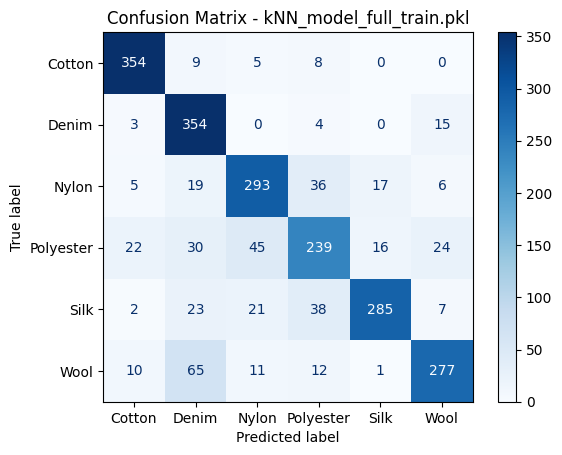

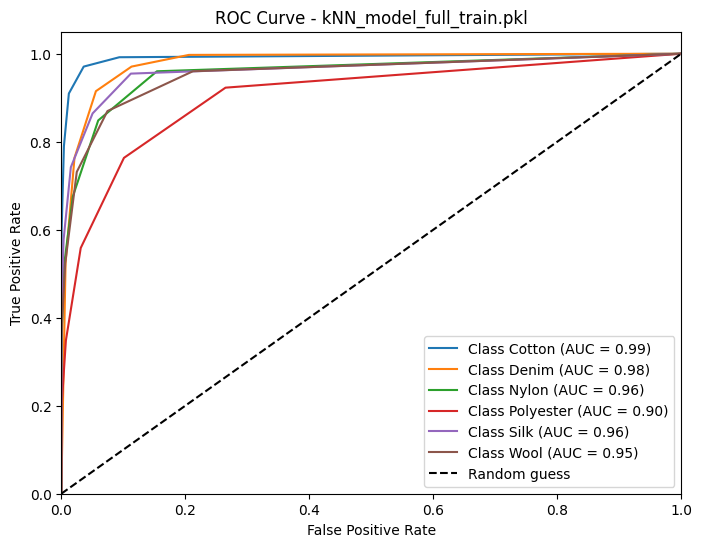

In [23]:
import os
import joblib
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Giả sử nhãn lớp được định nghĩa như sau
class_labels = ['Cotton', 'Denim', 'Nylon', 'Polyester', 'Silk', 'Wool']

# Binarize the labels for multi-class ROC AUC
y_val_bin = label_binarize(y_val, classes=range(len(class_labels)))

# Vòng lặp đánh giá mô hình
for model_name, model_clf in models.items():
    # Dự đoán xác suất trên tập validation
    y_pred_val_prob = model_clf.predict_proba(X_val)
    # Dự đoán lớp
    y_pred_val = model_clf.predict(X_val)

    # Tính toán các chỉ số
    val_acc = accuracy_score(y_val, y_pred_val)
    val_precision = precision_score(y_val, y_pred_val, average='weighted')
    val_recall = recall_score(y_val, y_pred_val, average='weighted')
    val_f1 = f1_score(y_val, y_pred_val, average='weighted')
    val_auc = roc_auc_score(y_val_bin, y_pred_val_prob, average='weighted', multi_class='ovr')

    # In thông tin kết quả
    print(f'Baseline [{model_name}]')
    print(f'+ Accuracy = {val_acc:.3f}')
    print(f'+ Precision = {val_precision:.3f}')
    print(f'+ Recall = {val_recall:.3f}')
    print(f'+ F1-score = {val_f1:.3f}')
    print(f'+ AUC = {val_auc:.3f}')
    print()

    # Vẽ confusion matrix
    cm = confusion_matrix(y_val, y_pred_val)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # Vẽ ROC cho từng lớp
    plt.figure(figsize=(8, 6))
    for i in range(len(class_labels)):
        fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_pred_val_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

Baseline [XGBoost_model_full_train.pkl]
+ Accuracy = 0.835
+ Precision = 0.839
+ Recall = 0.835
+ F1-score = 0.834
+ AUC = 0.966



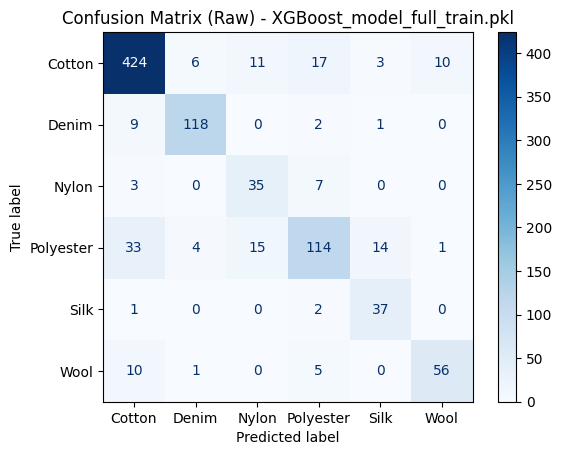

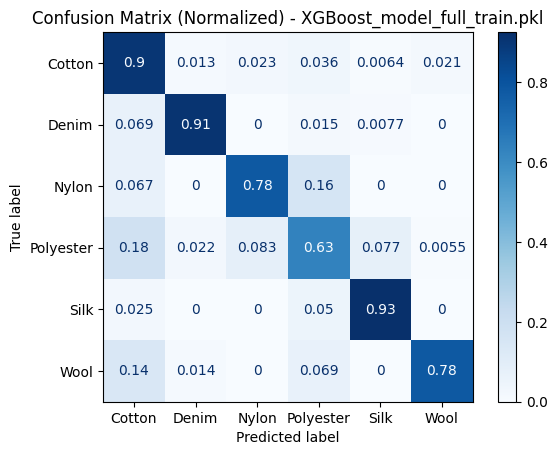

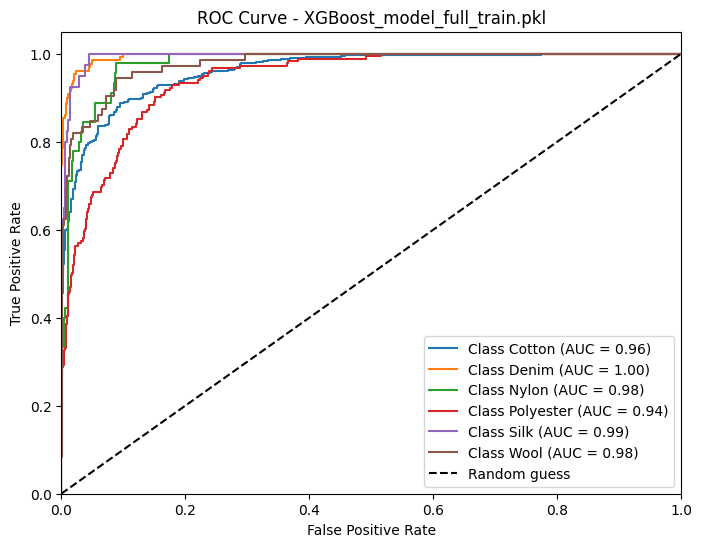

Baseline [LightGBM_model_full_train.pkl]
+ Accuracy = 0.846
+ Precision = 0.850
+ Recall = 0.846
+ F1-score = 0.846
+ AUC = 0.969



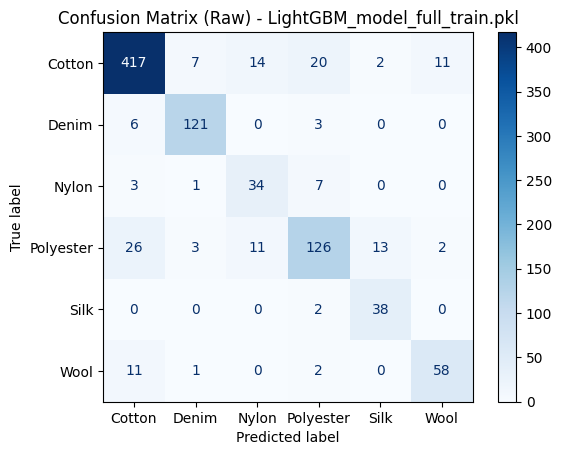

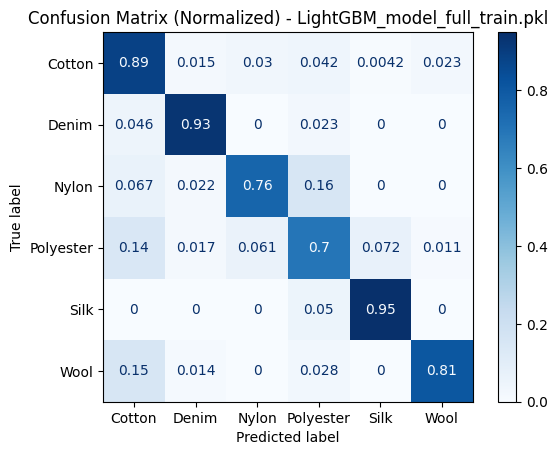

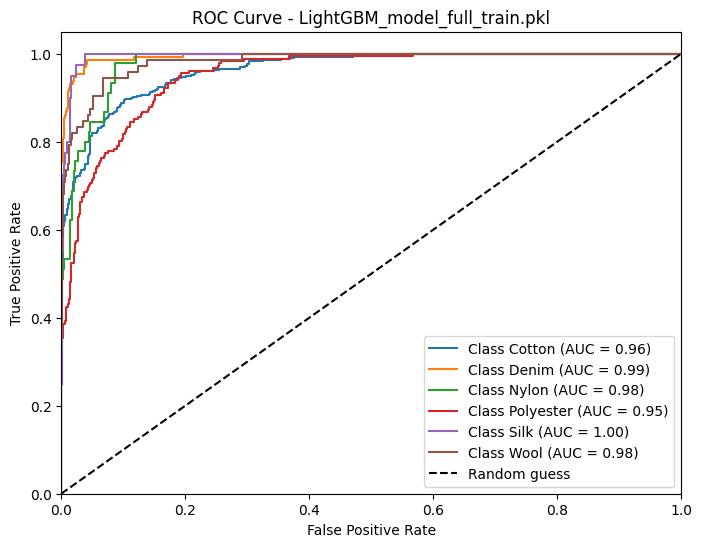

Baseline [Random Forest_model_full_train.pkl]
+ Accuracy = 0.769
+ Precision = 0.769
+ Recall = 0.769
+ F1-score = 0.760
+ AUC = 0.914



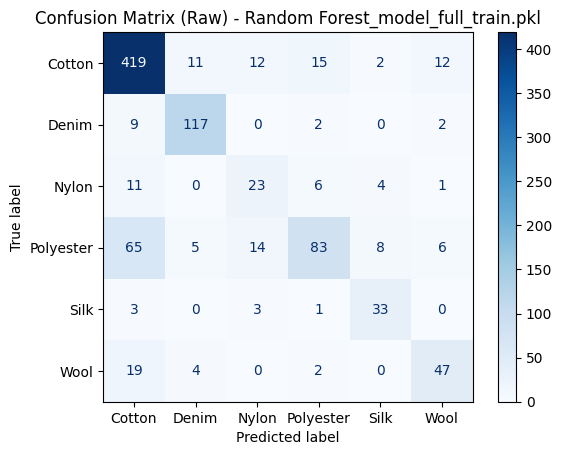

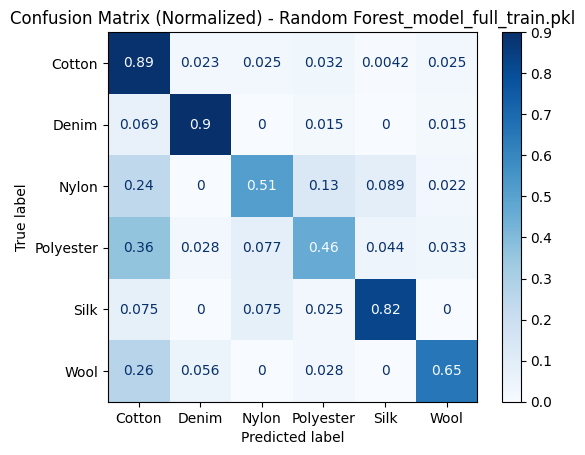

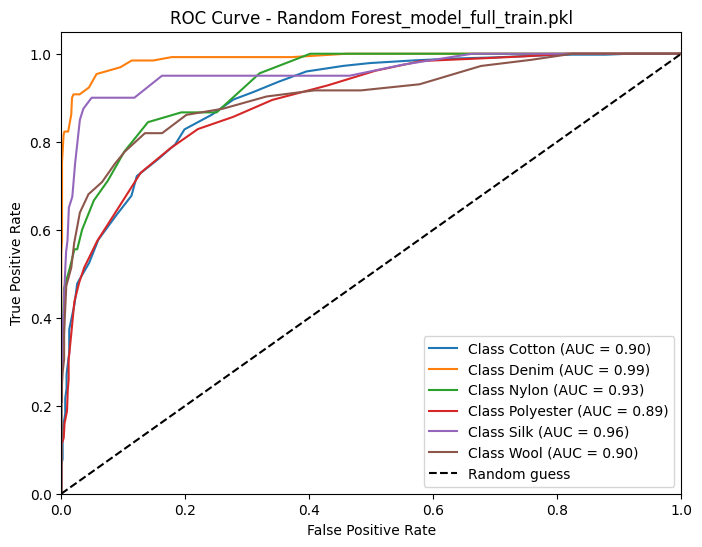

Baseline [AdaBoost_model_full_train.pkl]
+ Accuracy = 0.507
+ Precision = 0.604
+ Recall = 0.507
+ F1-score = 0.530
+ AUC = 0.688



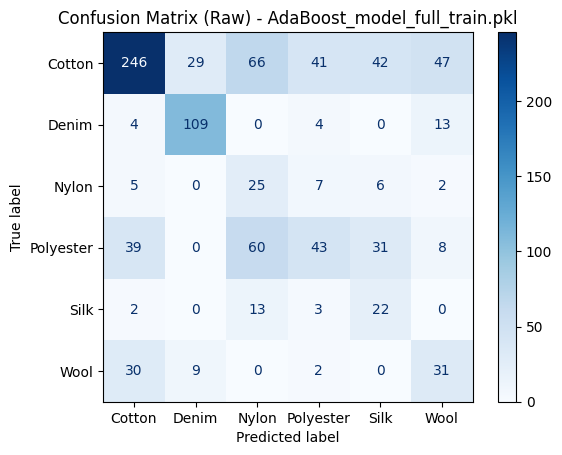

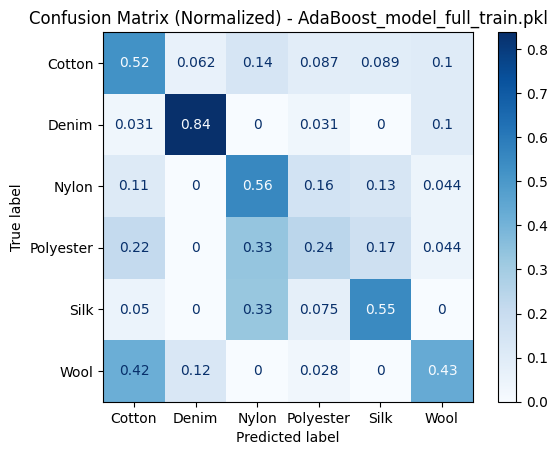

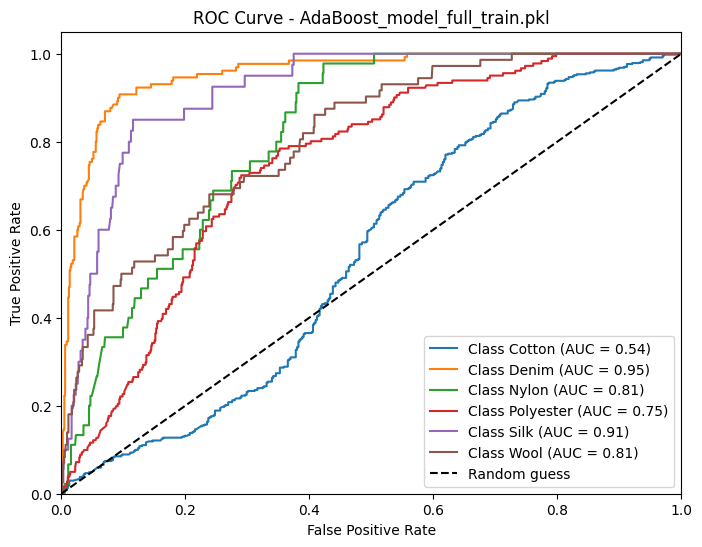

Baseline [MLP_model_full_train.pkl]
+ Accuracy = 0.903
+ Precision = 0.903
+ Recall = 0.903
+ F1-score = 0.903
+ AUC = 0.985



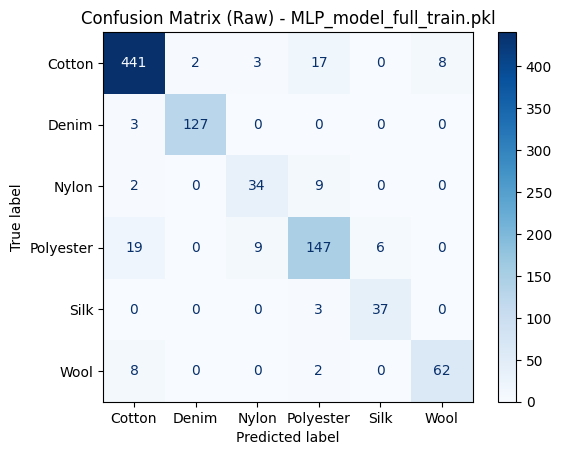

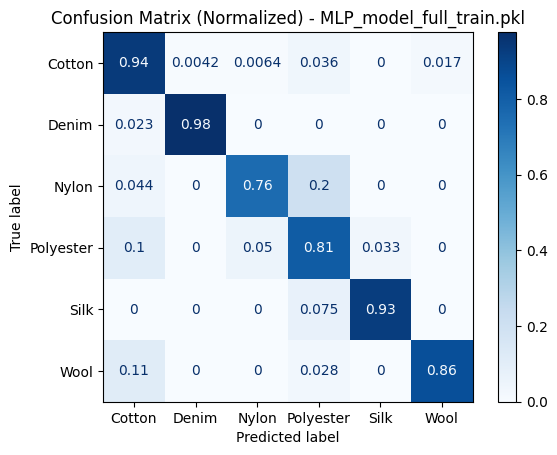

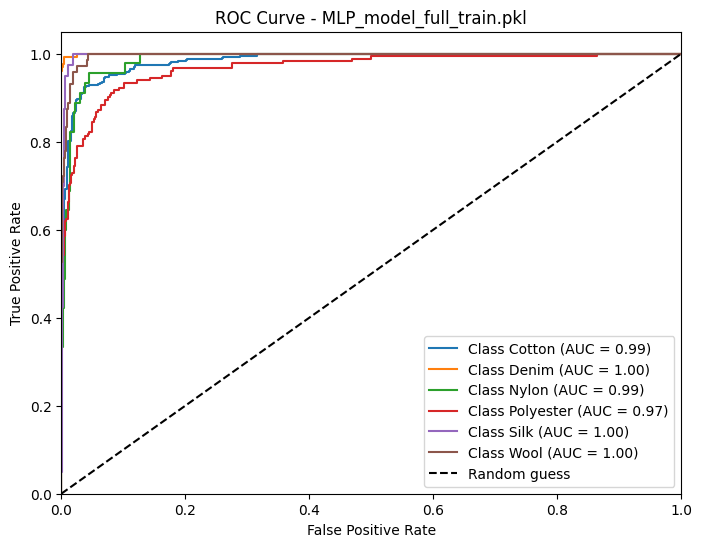

Baseline [SVM_model_full_train.pkl]
+ Accuracy = 0.909
+ Precision = 0.911
+ Recall = 0.909
+ F1-score = 0.909
+ AUC = 0.984



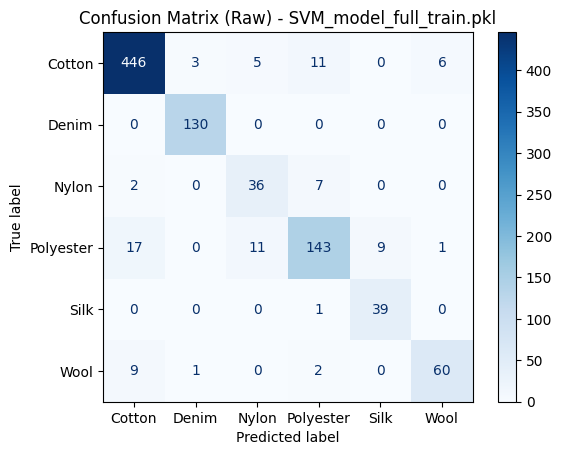

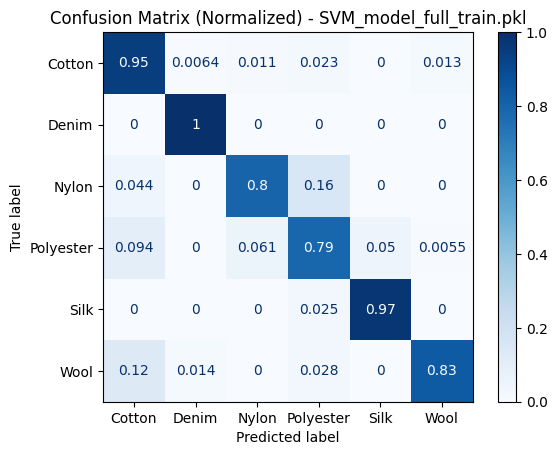

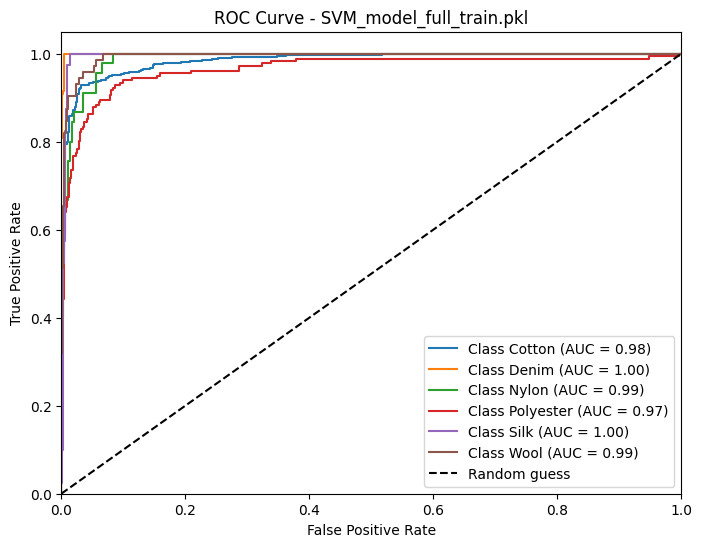

Baseline [CART (Decision Trees)_model_full_train.pkl]
+ Accuracy = 0.633
+ Precision = 0.685
+ Recall = 0.633
+ F1-score = 0.648
+ AUC = 0.763



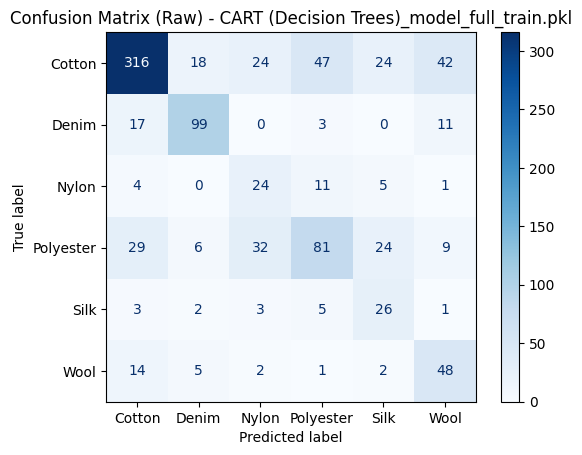

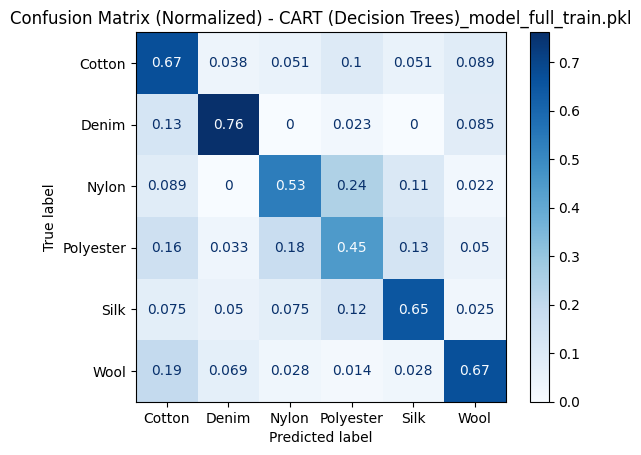

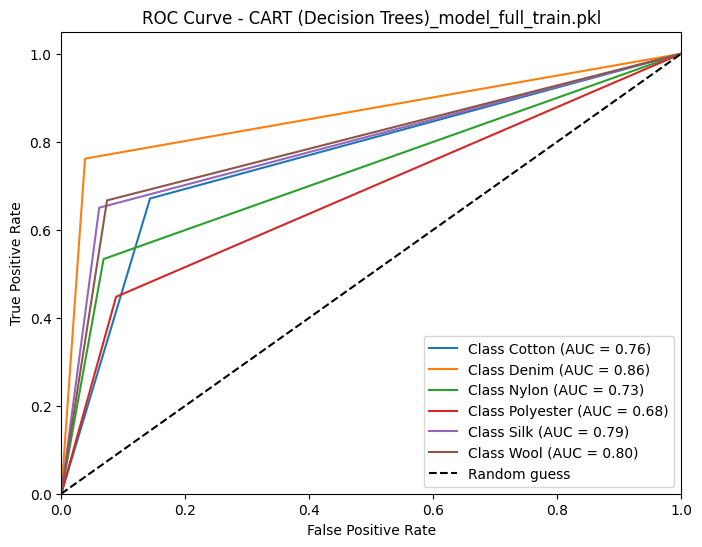

Baseline [Logistic Regression_model_full_train.pkl]
+ Accuracy = 0.817
+ Precision = 0.822
+ Recall = 0.817
+ F1-score = 0.818
+ AUC = 0.953



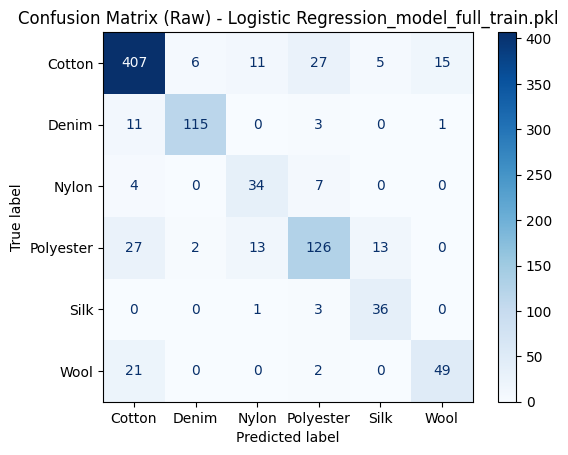

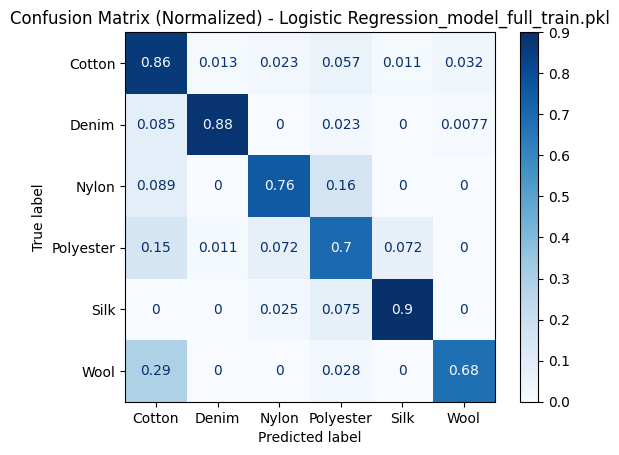

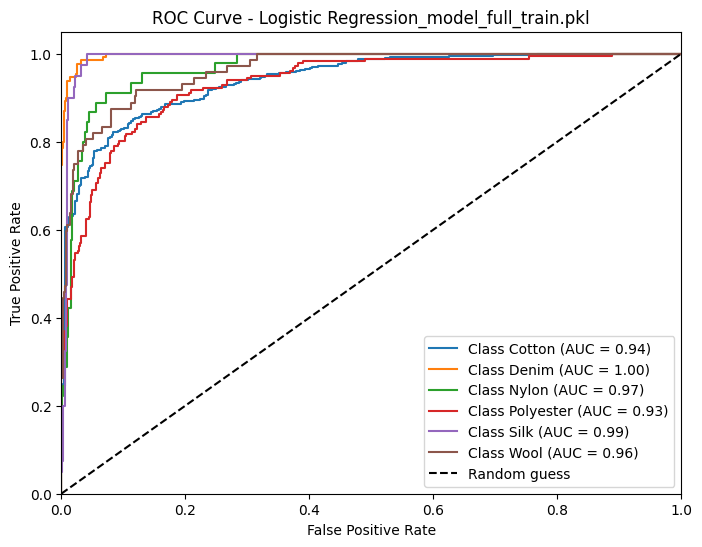

Baseline [LDA_model_full_train.pkl]
+ Accuracy = 0.900
+ Precision = 0.903
+ Recall = 0.900
+ F1-score = 0.901
+ AUC = 0.983



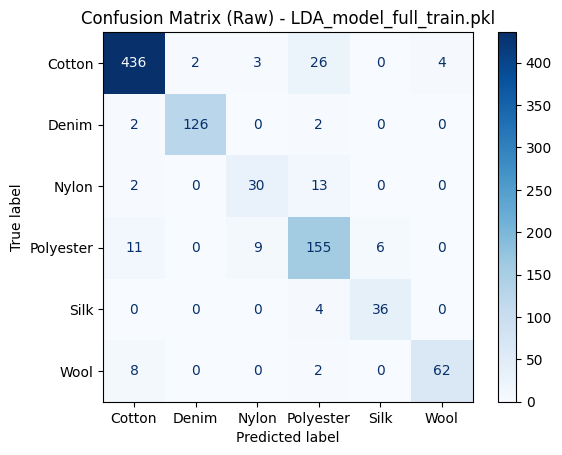

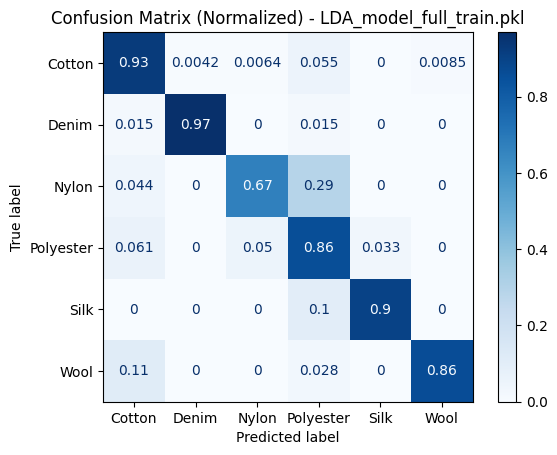

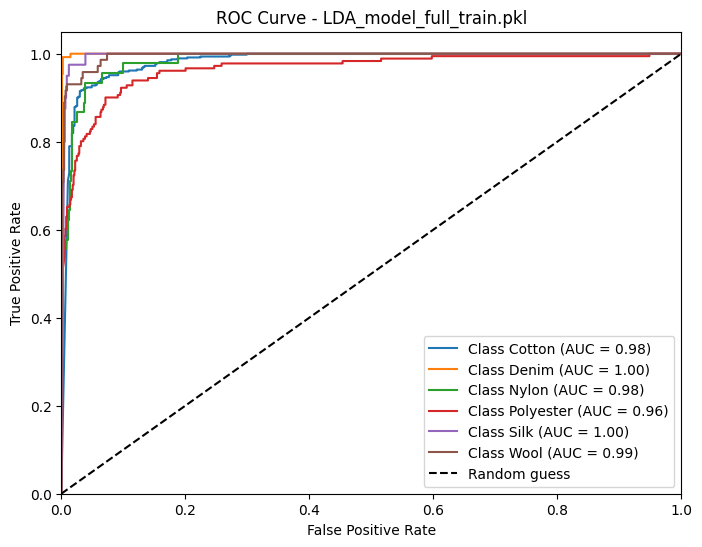

Baseline [kNN_model_full_train.pkl]
+ Accuracy = 0.879
+ Precision = 0.882
+ Recall = 0.879
+ F1-score = 0.879
+ AUC = 0.980



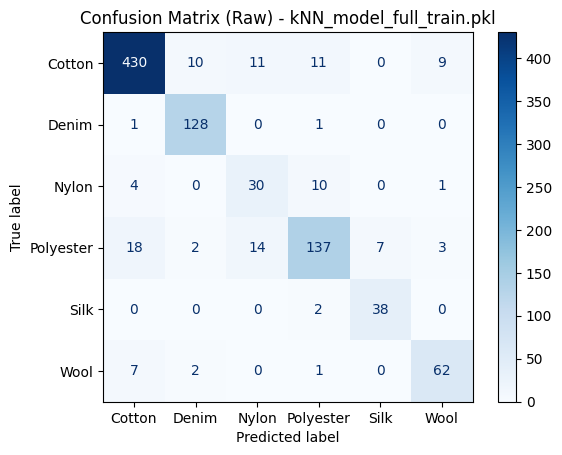

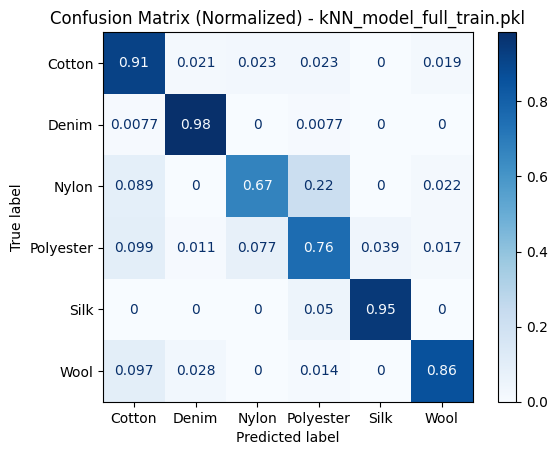

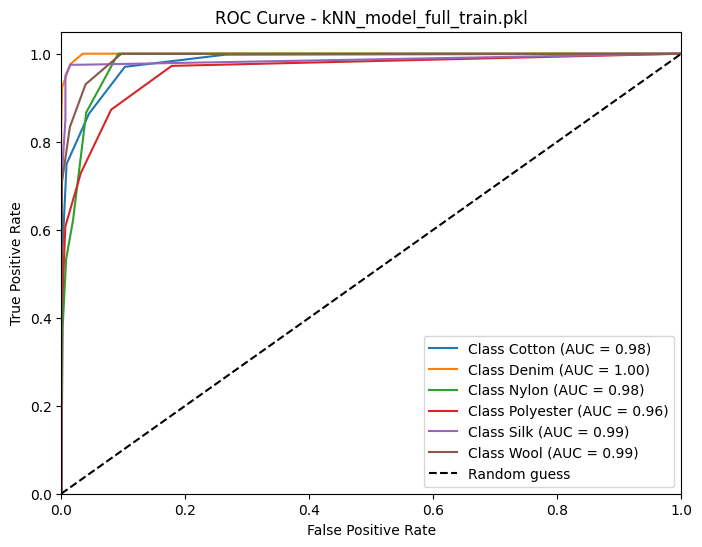

In [25]:
import os
import joblib
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Giả sử nhãn lớp được định nghĩa như sau
class_labels = ['Cotton', 'Denim', 'Nylon', 'Polyester', 'Silk', 'Wool']

# Binarize the labels for multi-class ROC AUC
y_test_bin = label_binarize(y_test, classes=range(len(class_labels)))

# Vòng lặp đánh giá mô hình
for model_name, model_clf in models.items():
    # Dự đoán xác suất trên tập kiểm tra
    y_pred_test_prob = model_clf.predict_proba(X_test)
    # Dự đoán lớp
    y_pred_test = model_clf.predict(X_test)

    # Tính toán các chỉ số
    test_acc = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    test_auc = roc_auc_score(y_test_bin, y_pred_test_prob, average='weighted', multi_class='ovr')

    # In thông tin kết quả
    print(f'Baseline [{model_name}]')
    print(f'+ Accuracy = {test_acc:.3f}')
    print(f'+ Precision = {test_precision:.3f}')
    print(f'+ Recall = {test_recall:.3f}')
    print(f'+ F1-score = {test_f1:.3f}')
    print(f'+ AUC = {test_auc:.3f}')
    print()

    # Vẽ confusion matrix không chuẩn hóa
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix (Raw) - {model_name}')
    plt.show()

    # Vẽ confusion matrix với chuẩn hóa
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    disp_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=class_labels)
    disp_normalized.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix (Normalized) - {model_name}')
    plt.show()

    # Vẽ ROC cho từng lớp
    plt.figure(figsize=(8, 6))
    for i in range(len(class_labels)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_test_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
